In [66]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import accuracy_score
from sklearn.preprocessing   import StandardScaler

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree     import DecisionTreeClassifier

In [67]:
df = pd.read_csv("C:/Users/ISD/Python_ali/fault_detection/Pv_Data2.csv")
df;
X = df.drop(['Target'],axis=1).values

Y=df.loc[:,'Target']
X.shape

(1600, 7)

In [68]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.3,random_state=42)

In [69]:
sc=StandardScaler()

scaler = sc.fit(trainX)
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)

In [70]:
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=120,random_state=0)

In [71]:
model.fit(trainX,trainY)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=120, random_state=0)

In [72]:
ypred=model.predict(trainX) 

In [73]:
c=accuracy_score(trainY,ypred)*100
c

99.10714285714286

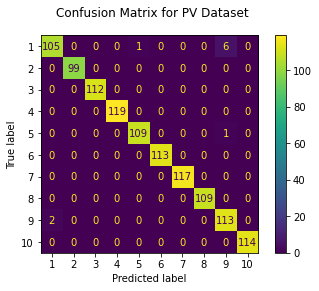

In [74]:
fig = plot_confusion_matrix(model,trainX,trainY, display_labels=model.classes_)
fig.figure_.suptitle("Confusion Matrix for PV Dataset")
plt.show()

In [75]:
ypred1=model.predict(testX)

In [76]:
c1=accuracy_score(testY,ypred1)*100
c1

74.79166666666667

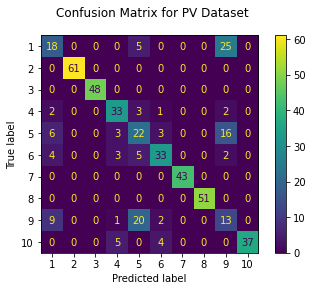

In [77]:
fig = plot_confusion_matrix(model,testX,testY, display_labels=model.classes_)
fig.figure_.suptitle("Confusion Matrix for PV Dataset")
plt.show()

In [78]:
YR=np.concatenate((trainY,testY),axis=0)

In [79]:
YP = np.concatenate((ypred,ypred1), axis=0)

In [80]:
ac2=accuracy_score(YR,YP)*100
ac2

91.8125

In [81]:
c2=confusion_matrix(YR,YP)
c2

array([[123,   0,   0,   0,   6,   0,   0,   0,  31,   0],
       [  0, 160,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 160,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0,   0, 152,   3,   1,   0,   0,   2,   0],
       [  6,   0,   0,   3, 131,   3,   0,   0,  17,   0],
       [  4,   0,   0,   3,   5, 146,   0,   0,   2,   0],
       [  0,   0,   0,   0,   0,   0, 160,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 160,   0,   0],
       [ 11,   0,   0,   1,  20,   2,   0,   0, 126,   0],
       [  0,   0,   0,   5,   0,   4,   0,   0,   0, 151]], dtype=int64)